<a href="https://colab.research.google.com/github/mburu-mwangi/Moringa-Machine-Learning-Wk-2/blob/main/Moringa_Data_Science_Core_W7_Independent_Project_2021_10_Alfonce_Mwangi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question


> As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.



### b) Defining the Metric for Success


> My metric of success will be achieved by understanding and revealing the factors that affect housing prices.

> More to that, a model that predicts the prices of houses from given predictor variables will be necessary.

> Then comparing the different models to get the most suitable one, the one that gives the most desired results.

> Give recommendations using the best model.

### c) Understanding the context 

### d) Recording the Experimental Design

> The dataset wil have to be analyzed first, through the univariate, bivariate analysis.
> Then it will undergo modelling through few approaches:

*   Multiple Linear Regression
*   Quantile Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic Net Regression

### e) Data Relevance

The variables that ihave for the dataset are:

* Id 
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot1

I conclude that the data is relevant to the task given.

## 2. Reading the Data

### Importing the various libraries needed

In [123]:
# analysis tools
import pandas as pd
import numpy as np
import scipy.stats as stats

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Function Toolbox

In [124]:
# Removes outliers in the columns required
def Remove_Outlier(Df,col_name):
    q1 = Df[col_name].quantile(0.25)
    q3 = Df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_bound  = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)
    df_out = Df.loc[(Df[col_name] > lower_bound) & (Df[col_name] < upper_bound)]
    DF = df_out
    return DF

In [125]:
def bivariate_viz(data,variable_1,variable_2,palette):
  data = data.nunique
  bi_data = data.groupby([variable_1,variable_2])[variable_2].count()
  output = pd.DataFrame(bi_data)
  df = output.rename(columns={f"{variable_2}":'Count'}).reset_index()
  sns.set_style("whitegrid")
  ax,bar = plt.subplots(figsize = (12,10))
  ax=sns.barplot(x=f"{variable_1}",y='Count',hue=f"{variable_2}", data=df,palette=palette)

  plt.show()

### Loading the datasets


In [126]:
# Dataset URL = 'http://bit.ly/IndependentProjectWeek7Dataset'
#
URL = 'http://bit.ly/IndependentProjectWeek7Dataset'  
housing = pd.read_csv(URL)

In [127]:
# Preview of the data
#
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 3. Checking the Data

In [128]:
# Determining the shape in our dataset
#
print('The Housing dataset has: ',housing.shape[0],'Rows and ',housing.shape[1],'Columns')

The Housing dataset has:  21613 Rows and  20 Columns


In [129]:
# Previewing the top of our dataset
#
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [130]:
# Previewing the bottom of our dataset
# 
housing.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [131]:
# Checking whether each column has an appropriate datatype and the general info of every variable
# 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [132]:
housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [133]:
# Dropping the unnecessary columns
#
housing = housing.drop(['id'], axis=1)

In [134]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


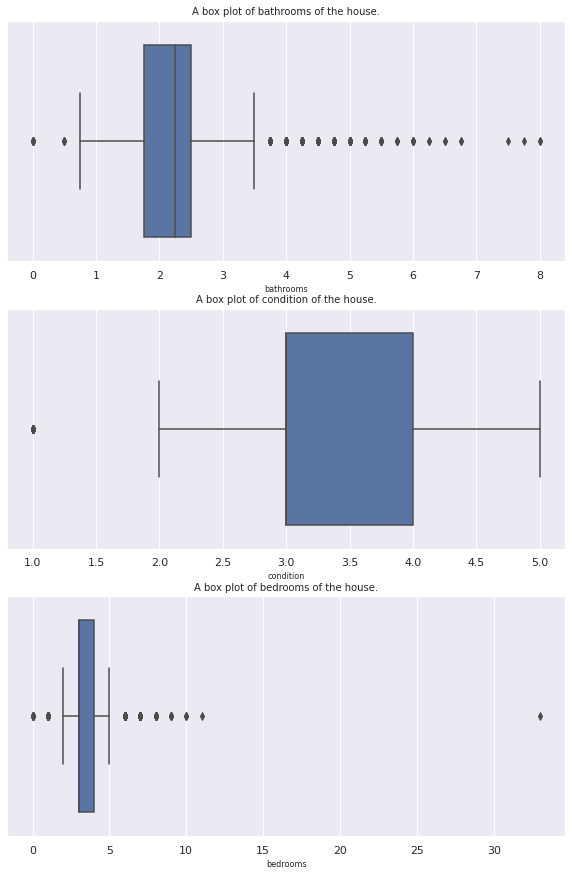

In [135]:
# Checking for Outliers
#
col_names=['bathrooms','condition','bedrooms']
fig,ax=plt.subplots(len(col_names),figsize=(10,15))
# 
for i, col_vals in enumerate(col_names):
  sns.boxplot(housing[col_vals],ax=ax[i])
  ax[i].set_title('A box plot of '+col_vals+ ' of the house.',fontsize=10)
  ax[i].set_xlabel(col_vals,fontsize=8)
plt.show()

In [136]:
# housing['bathrooms'].value_counts()

In [137]:
# housing.loc[housing['bathrooms']>5 ]

In [138]:
# Checking for Anomalies
# dropping some exteme cases in the bathrooms and bedrooms columns 
housing = housing.drop(housing[housing['bedrooms'] > 8].index)
housing = housing.drop(housing[housing['bedrooms'] < 1].index)
housing = housing.drop(housing[housing['bathrooms'] < 0.5].index)

housing.shape

(21586, 19)

In [139]:
# Identifying the Missing Data
#
housing.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

There are no missing values

In [140]:
# Checking for duplicates
#
housing.duplicated().sum()

5

In [141]:
# Dropping duplicates
#
housing = housing.drop_duplicates()

# Checking the shape
#
housing.shape

(21581, 19)

In [142]:
# reshaping the index
#
housing = housing.reset_index(drop=True)

## 6. Exploratory Analysis

### Univariate Analysis

In [143]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [144]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.158100e+04,21581.000000,21581.000000,21581.000000,2.158100e+04,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000,21581.000000
mean,5.401660e+05,3.369075,2.114962,2079.662713,1.510649e+04,1.493721,0.007553,0.234234,3.409898,7.657708,1788.215838,291.446875,1971.010519,84.249896,98077.948612,47.560052,-122.213943,1986.649877,12763.563876
std,3.673802e+05,0.894565,0.767536,917.663696,4.142709e+04,0.539557,0.086581,0.766325,0.650588,1.173196,827.615966,442.451939,29.362585,401.332370,53.519671,0.138587,0.140742,685.336266,27283.673893
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.042000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470800,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,8.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [145]:
# checking the basic decriptive analysis
#
print(housing['price'].mean())


540165.9630693665


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Houses that have waterfronts VS those that dont')

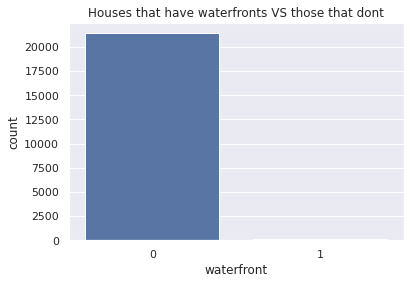

In [146]:
# plotting a visual on the houses that have waterfronts and those that don't
#
sns.countplot(housing['waterfront'],order=housing['waterfront'].value_counts().index)
plt.title('Houses that have waterfronts VS those that dont')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the number of floors in the houses')

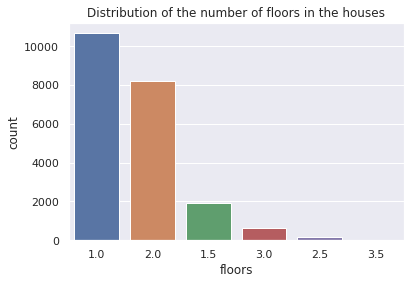

In [147]:
# Plotting for the number of floors across the houses in the dataset
#
sns.countplot(housing['floors'],order=housing['floors'].value_counts().index)
plt.title('Distribution of the number of floors in the houses')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the number of floors in the houses')

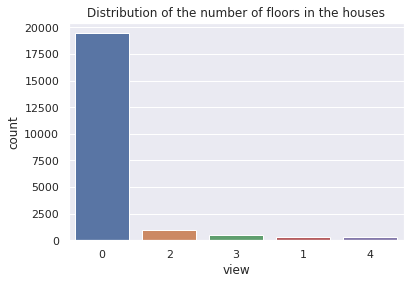

In [148]:
# Plotting for the number of floors across the houses in the dataset
#
sns.countplot(housing['view'],order=housing['view'].value_counts().index)
plt.title('Distribution of the number of floors in the houses')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the number of bathrooms in the houses')

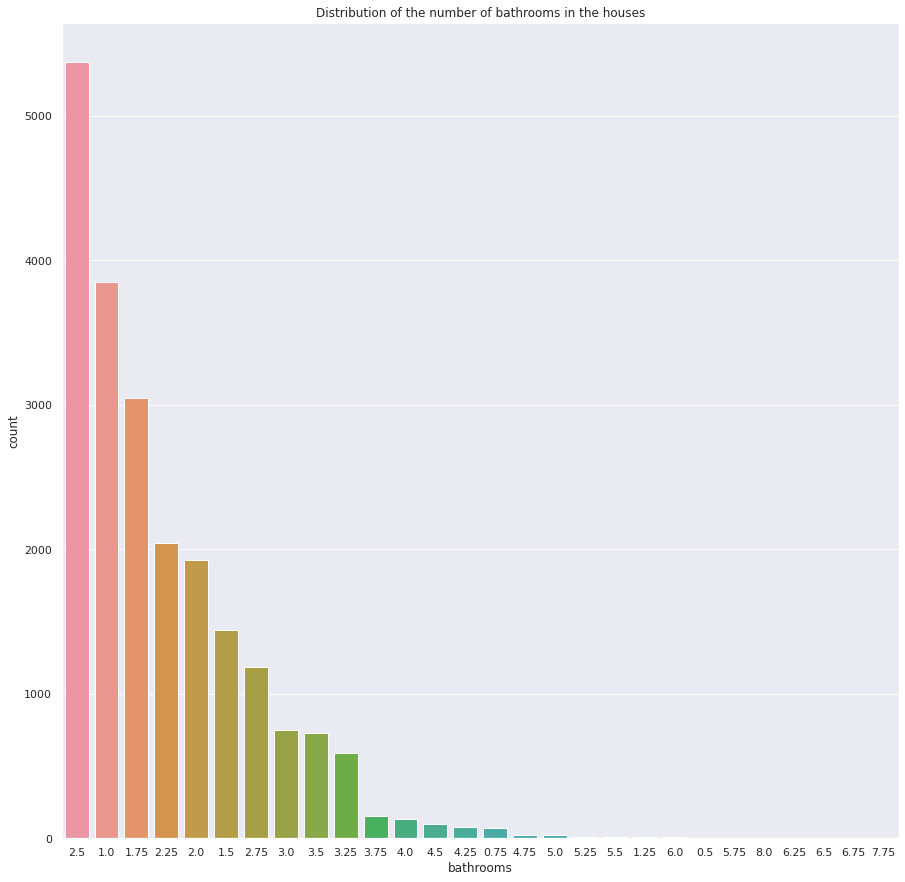

In [163]:
# plotting for th number of bathrooms across the houses in the dataset
#
sns.countplot(housing['bathrooms'],order=housing['bathrooms'].value_counts().index)
sns.set(rc = {'figure.figsize':(15,15)})
plt.title('Distribution of the number of bathrooms in the houses')

From the Univariate Analysis, I can state that:

*  The mean price of the houses is 540165.9630693665
*  Most of the houses do not have waterfronts
*  Most houses are bungalows
*  Most houses have 2 complete bathrooms and 1 half bathroom
*  Majority of the houses do not have a view

### Bivariate Analysis

In [150]:
# checking the columns
#
housing.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 7. Implementing the Solution

### Linear Regression


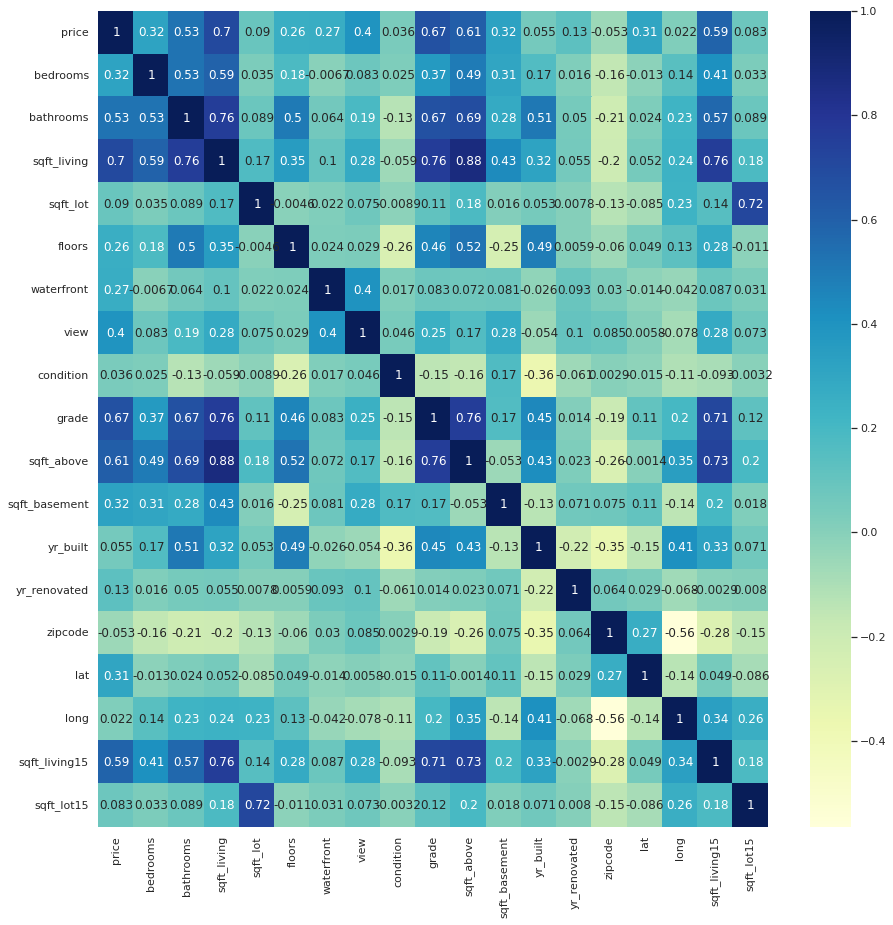

In [151]:
plt.figure(figsize=(15,15))
sns.heatmap(housing.corr(), annot=True, cmap="YlGnBu")

plt.show()

In [166]:
# Checking the weights of the predictor variables using the VIF formula
# 
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = housing.drop(['price','sqft_living','sqft_lot','yr_renovated'],axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

         features    vif_Factor
0        bedrooms  2.581701e+01
1       bathrooms  2.853211e+01
2          floors  1.690653e+01
3      waterfront  1.209324e+00
4            view  1.551377e+00
5       condition  3.381632e+01
6           grade  1.486799e+02
7      sqft_above  2.806038e+01
8   sqft_basement  2.884020e+00
9        yr_built  8.663114e+03
10        zipcode  1.619185e+06
11            lat  1.386039e+05
12           long  1.355743e+06
13  sqft_living15  2.700718e+01
14     sqft_lot15  1.357497e+00


In [177]:
# Using Cross Validation KFold
#

from sklearn.model_selection import KFold

# predictor variables
F = housing.drop(['price','sqft_living','sqft_lot','yr_renovated'],axis=1).values
q = housing['price'].values

folds = KFold(n_splits = 10)

# Getting the number of KFold splits
print("Folds: "+str(folds.get_n_splits(X)))

RMSES=[] 
count = 1 #
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))

  F_train, F_test = F[train_index], F[test_index]
  q_train, q_test = q[train_index], q[test_index]

  # fitting the model accordingly
  regressor = LinearRegression()
  regressor.fit(F_train, q_train)

  # Predicting the model
  q_predict = regressor.predict(F_test)

  # Evaluating the model
  rmse_value = np.sqrt(metrics.mean_squared_error(q_test,q_predict))
  # Storing the value in the list created RMSES[]
  RMSES.append(rmse_value)

  # printing the results

  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)

  count = count + 1


Folds: 10

Training model 1
Model 1 Root Mean Squared Error: 209681.15180414545

Training model 2
Model 2 Root Mean Squared Error: 218628.5038972911

Training model 3
Model 3 Root Mean Squared Error: 189671.2596681035

Training model 4
Model 4 Root Mean Squared Error: 225019.74151967626

Training model 5
Model 5 Root Mean Squared Error: 187773.58039020258

Training model 6
Model 6 Root Mean Squared Error: 191942.0253164575

Training model 7
Model 7 Root Mean Squared Error: 188804.20874721126

Training model 8
Model 8 Root Mean Squared Error: 194066.74469925836

Training model 9
Model 9 Root Mean Squared Error: 201022.32627179864

Training model 10
Model 10 Root Mean Squared Error: 213120.6886690462


In [178]:
np.mean(RMSES)

201973.02309831907

In [167]:
from sklearn.model_selection import train_test_split

# getting our predictor and response variables
#
X = X.values
y = housing['price'].values

# Splitting the variables to test and trained data
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [168]:
from sklearn.linear_model import LinearRegression
# Getting the optimal coefficients and intercept
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.coef_)
print(regressor.intercept_)

[-4.30385713e+04  4.37324054e+04  1.70621237e+03  5.76472314e+05
  5.61561862e+04  2.50326348e+04  9.46945614e+04  1.97559105e+02
  1.59016352e+02 -2.72185958e+03 -6.08673506e+02  6.06695359e+05
 -2.14513938e+05  1.41528984e+01 -3.08468513e-01]
9329930.965816086


In [169]:
# Predicting the values and checking the model
y_pred = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,4.317000e+03,4.317000e+03
mean,5.414667e+05,5.435301e+05
std,3.467414e+05,3.091154e+05
min,8.500000e+04,-2.301742e+05
25%,3.200000e+05,3.326878e+05
50%,4.550000e+05,4.907263e+05
75%,6.500000e+05,6.930446e+05
max,3.600000e+06,3.301010e+06


In [170]:

from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 125424.54924791906
Mean Squared Error: 35756883289.20131
Root Mean Squared Error: 189094.90550832223


In [182]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

2063.3953023571144

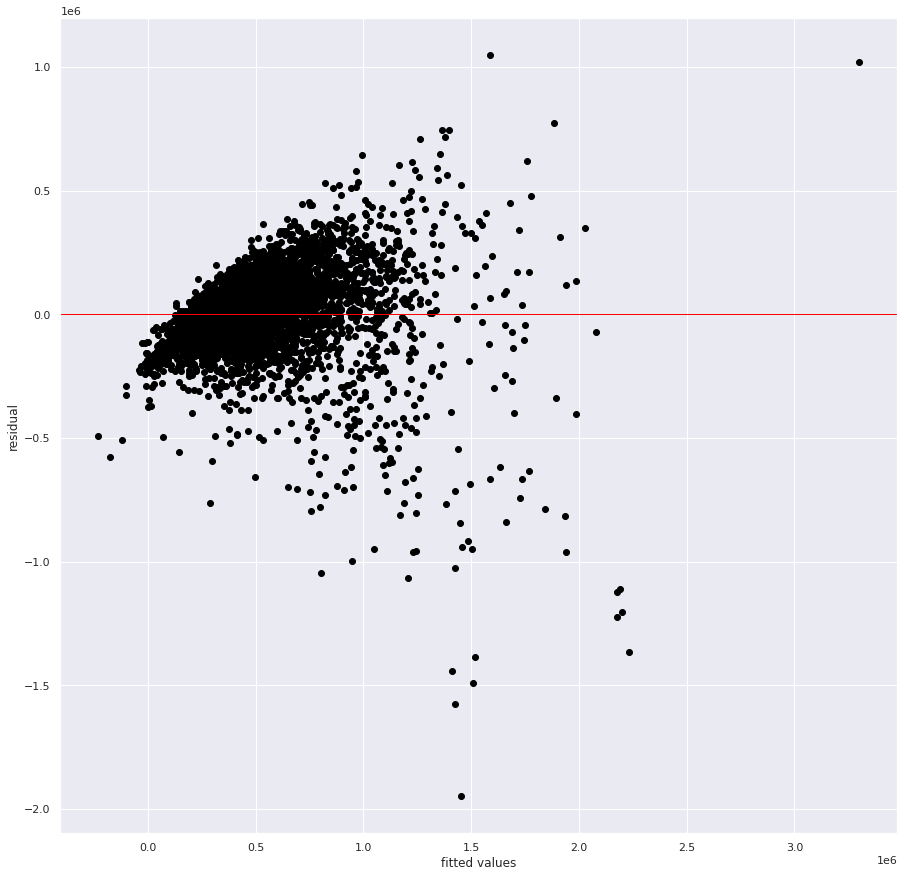

In [184]:
# Showing the residuals on a scatter plot
#
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [185]:
# Bartlets
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


### Ridge Regression

In [186]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [187]:
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_)

40957201623.98648

In [188]:
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
mse = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(mse)

40482328538.28772


### Lasso Regression

In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [194]:

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 


print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.7001403869687395
lasso MSE: 40469637663.07798
lasso coef: [-35482.33469971  34492.16090958   3811.30934615  50716.53139482
  40741.69221371  15943.05608181 113745.24240463 152081.49555628
  67285.8184179  -81284.64982508 -31508.86990448  82853.62310906
 -29641.15524336  13333.66302613  -7147.38210084]


In [195]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.7025515250573808
linear score: 0.7025260512104631
lasso MSE: 35753821288.73058
linear MSE: 35756883289.201126
lasso best estimator coef: [-38416.34793232  33548.44024233    879.24771421  49896.83824882
  43031.83821738  16267.16305744 111124.68653931 163422.03225207
  70306.13576196 -79871.10951288 -32504.65379528  84056.15238688
 -30147.06984979   9690.83514253  -8386.33901165]
linear coef: [-38499.90765806  33565.42079615    920.57689582  49910.29636436
  43032.9036115   16285.54792843 111092.74180001 163499.28151914
  70355.46318032 -79918.98077892 -32575.2508261   84078.22354589
 -30190.39731689   9699.26985403  -8415.95931564]


### Elastic Regression

In [196]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [197]:
search.fit(X,y)
search.best_params_
abs(search.best_score_)

41056508977.879715

In [199]:
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
MSE=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(MSE)

84849077161.26035


### Quantile Regression

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [175]:
# Reviewing the Solution 
#


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?